In [47]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns
from matplotlib import pyplot as plt


In [84]:
transactions=pd.read_excel("C://Users//mvish//Desktop//Online retail.xlsx")
transactions

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt
...,...
7495,"butter,light mayo,fresh bread"
7496,"burgers,frozen vegetables,eggs,french fries,ma..."
7497,chicken
7498,"escalope,green tea"


In [85]:
transactions = [
    ["burgers", "meatballs", "eggs"],
    ["chutney"],
    ["turkey", "avocado"],
    ["mineral water", "milk", "energy bar", "whole wheat rice", "green tea"],
    ["low fat yogurt"],
    ["butter", "light mayo", "fresh bread"],
    ["burgers", "frozen vegetables", "eggs", "french fries", "mashrooms"],
    ["chicken"],
    ["escalope", "green tea"],
    ["eggs", "frozen smoothie", "yogurt cake", "low fat yogurt"]
]


In [86]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
basket = pd.DataFrame(te_ary, columns=te.columns_)

In [87]:
te

TransactionEncoder()

In [88]:
te_ary

array([[False,  True, False, False, False,  True, False, False, False,
        False, False, False, False, False, False, False,  True, False,
        False, False, False, False],
       [False, False, False, False,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False],
       [ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False],
       [False, False, False, False, False, False,  True, False, False,
        False, False, False,  True, False, False, False, False,  True,
         True, False,  True, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True, False, False, False,
        False, False, False, False],
       [False, False,  True, False, False, False, False, False, False,
         True, False, False, False

In [89]:
basket

,avocado,burgers,butter,chicken,chutney,eggs,energy bar,escalope,french fries,fresh bread,...,green tea,light mayo,low fat yogurt,mashrooms,meatballs,milk,mineral water,turkey,whole wheat rice,yogurt cake
0,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,True,True,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
5,False,False,True,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
6,False,True,False,False,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
7,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [90]:
print(basket.head())

   avocado  burgers  butter  chicken  chutney   eggs  energy bar  escalope  \
0    False     True   False    False    False   True       False     False   
1    False    False   False    False     True  False       False     False   
2     True    False   False    False    False  False       False     False   
3    False    False   False    False    False  False        True     False   
4    False    False   False    False    False  False       False     False   

   french fries  fresh bread  ...  green tea  light mayo  low fat yogurt  \
0         False        False  ...      False       False           False   
1         False        False  ...      False       False           False   
2         False        False  ...      False       False           False   
3         False        False  ...       True       False           False   
4         False        False  ...      False       False            True   

   mashrooms  meatballs   milk  mineral water  turkey  whole wheat rice  \

In [91]:
# Apply the Apriori algorithm to find frequent itemsets with a lower minimum support of 0.1
frequent_itemsets = apriori(basket, min_support=0.1, use_colnames=True)

# Check if frequent itemsets are found
print(frequent_itemsets)


    support                                           itemsets
0       0.1                                          (avocado)
1       0.2                                          (burgers)
2       0.1                                           (butter)
3       0.1                                          (chicken)
4       0.1                                          (chutney)
..      ...                                                ...
89      0.1  (green tea, whole wheat rice, energy bar, mine...
90      0.1  (energy bar, whole wheat rice, milk, mineral w...
91      0.1  (green tea, whole wheat rice, milk, mineral wa...
92      0.1  (frozen vegetables, mashrooms, french fries, e...
93      0.1  (mineral water, green tea, energy bar, whole w...

[94 rows x 2 columns]


In [92]:
if not frequent_itemsets.empty:
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

    # Display the generated rules
    print(rules)

    # Filter the rules based on support, confidence, and lift
    filtered_rules = rules[(rules['support'] >= 0.1) & 
                           (rules['confidence'] >= 0.5) & 
                           (rules['lift'] >= 1.0)]

    # Display the filtered rules
    print(filtered_rules)
else:
    print("No frequent itemsets found with the specified support threshold.")


            antecedents                                        consequents  \
0             (avocado)                                           (turkey)   
1              (turkey)                                          (avocado)   
2             (burgers)                                             (eggs)   
3                (eggs)                                          (burgers)   
4             (burgers)                                     (french fries)   
..                  ...                                                ...   
408     (mineral water)    (green tea, whole wheat rice, milk, energy bar)   
409         (green tea)  (whole wheat rice, milk, energy bar, mineral w...   
410        (energy bar)  (green tea, whole wheat rice, milk, mineral wa...   
411  (whole wheat rice)       (green tea, milk, energy bar, mineral water)   
412              (milk)  (green tea, whole wheat rice, energy bar, mine...   

     antecedent support  consequent support  support  confidenc

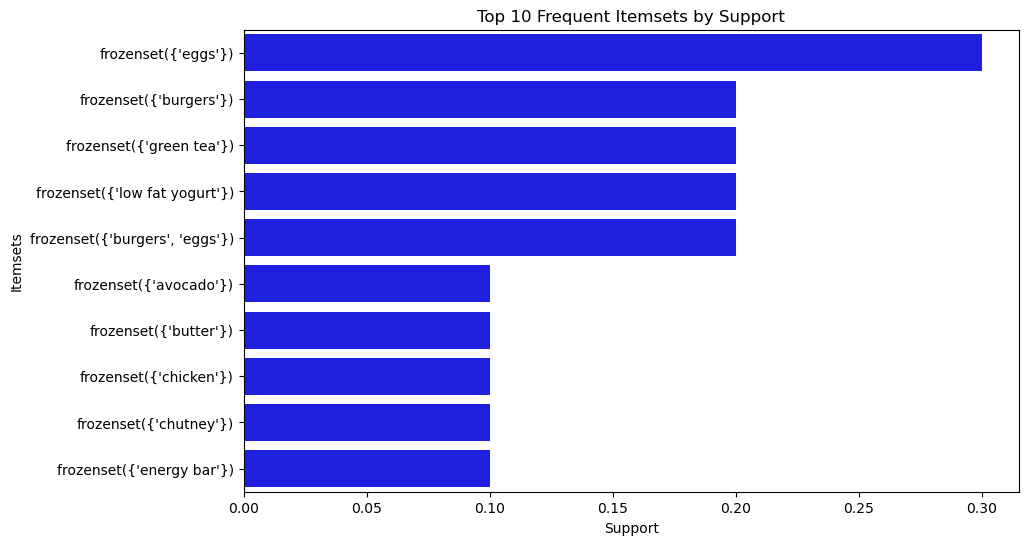

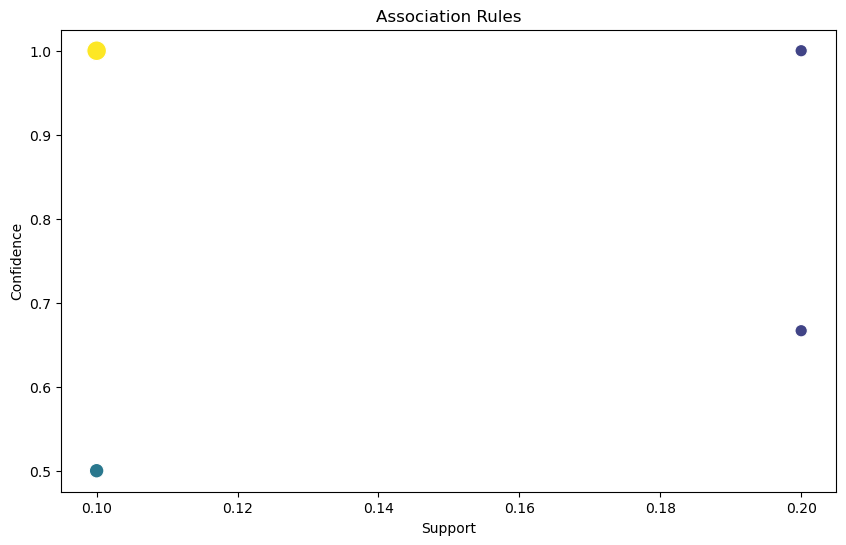

In [93]:
    top_10_itemsets = frequent_itemsets.nlargest(10, 'support')
    plt.figure(figsize=(10, 6))
    sns.barplot(x='support', y='itemsets', data=top_10_itemsets, color='blue')
    plt.title('Top 10 Frequent Itemsets by Support')
    plt.xlabel('Support')
    plt.ylabel('Itemsets')
    plt.show()

    # Plot the association rules
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', data=filtered_rules, palette='viridis', legend=False, sizes=(50, 200))
    plt.title('Association Rules')
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.show()

In [ ]:
Lift is a measure of the strength of association between two items in a rule. It is calculated as the ratio of the observed
support to the expected support if the two items were independent. Lift helps us understand how much more likely it is for the 
items to be purchased together compared to what would be expected by chance. A lift value greater than 1 indicates
a positive association between the items, suggesting that they are more likely to be bought together.

In [ ]:
Scalability: Association rule mining can be computationally expensive, especially for large datasets, due to the need to explore a large search space of itemsets.
Selection of Parameters: Setting appropriate thresholds for support, confidence, and lift can be subjective and may affect the quality and number of discovered rules.
Spurious Patterns: Association rules may sometimes capture spurious correlations or patterns that are not meaningful or actionable.
Handling Categorical Data: Association rule mining typically works with binary data, so categorical variables need to be appropriately encoded for analysis.
Interpretability: Interpreting and validating the discovered rules require domain knowledge and expertise to extract meaningful insights.

In [ ]:
Confidence measures the probability that a rule is true, given that the antecedent occurs. It is calculated as the number of transactions containing
both the antecedent and consequent divided by the number of transactions containing the antecedent

In [ ]:
Support measures the frequency of occurrence of a set of items in the dataset. It is calculated as the number of transactions containing 
the set of items divided by the total number of transactions.